In [1]:
%cd ..
import torch
from IPython.display import clear_output
from src.convexagon import Convexagon
from src.utils import plot_polygons

/home/ventus/spelldraw/spelldraw-shape-correction


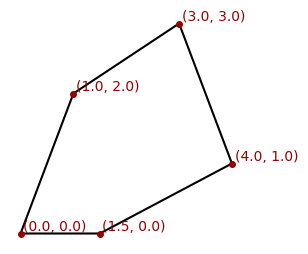

In [2]:
target = Convexagon((0, 0), (1, 2), (1.5, 0), (3, 3), (4,1))
target

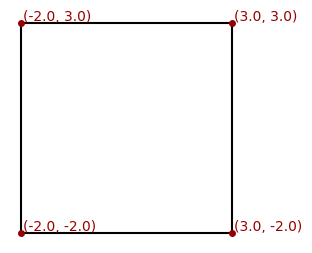

In [3]:
model = (Convexagon((0, 0), (0, 1), (1, 0), (1, 1)) * 5 - 2).requires_grad_(True)
model

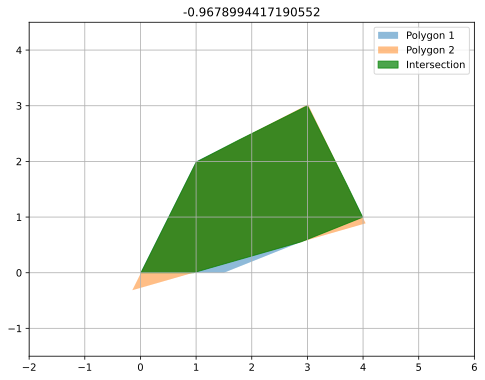

In [4]:
def dice_objective(polygon1: Convexagon, polygon2: Convexagon):
    return 2*(polygon1 & polygon2).area / (polygon1.area + polygon2.area)

optimizer = torch.optim.Adam([model], lr=0.1)
for i in range(200):

    optimizer.zero_grad()
    loss = -dice_objective(target, model)

    loss.backward()
    optimizer.step()

    clear_output(wait=True)  # Clear output before plotting new frame
    plot_polygons(target.detach(), model.detach(), title=loss.item())
